In [1]:
import numpy as np
from utils import sigmoid, sigmoid_backward
import pandas as pd
import matplotlib.pyplot as plt


## FORWARD

In [2]:
def initialize_parameters(linear_dims):
    parameters = {}
    for l in range(len(linear_dims)-1):
            parameters["W" + str(l+1)] = np.random.randint(2, size=(linear_dims[l+1], linear_dims[l]))
            parameters["b" + str(l+1)] = np.zeros(shape=(linear_dims[l+1], 1), dtype = int)
    return parameters

In [3]:
def linear_forward(A, W, b):
    cache = [W,A,b]
    W = np.array(W)
    Z = np.dot(W, A) + b
    return Z, cache

In [4]:
def activation_forward(A_prev, W, b, activation):
    Z, linear_cache = linear_forward(A_prev , W, b)
    A, activation_cache = sigmoid(Z)
    cache = [linear_cache, activation_cache]
    return A, cache

In [5]:
def model_forward(X, parameters):
    #because each layer has weight and bias (2 elements for a peceptron)
    L = len(parameters) // 2
    cache =  []
    AL, cache1 = activation_forward(X, parameters['W1'], parameters["b1"], 'sigmoid')
    cache.append(cache1)
    for l in range(L-1):
        AL, c_cache = activation_forward(AL, parameters["W" + str(l+2)], parameters["b" + str(l+2)], 'sigmoid')
        cache.append(c_cache)
    return AL, cache

## Cost

In [6]:
def compute_cost(AL, y):
    m = y.size              
    cost = -1*((1 / (m)) * np.sum(y.T) * np.log(np.sum(AL)) + np.sum((1-y)) * np.log(np.sum((1-AL))))
    #print("cost", cost)
    return cost

## BACKWARDS

In [7]:
def linear_backward(dZ, cache):
    #print(cache)
    W, A_prev, b = cache
    m = A_prev.size
    dA_prev = np.dot(W.T,dZ)
    db = (1/m)*np.sum(dZ, axis = 0)
    dW = ((1/m)* np.dot(dZ,dA_prev.T)).T
    return dA_prev, dW, db
    

In [8]:
 def activation_backward(dA, cache, activation):
        #linear_cache, activation_cache = cache
        #linear_cache = cache[0]
        #activation_cache = cache[1]
        #cache = np.array(cache).T
        #print( cache.T.shape)
        if activation == 'relu':
            dZ = relu_backward(dA, cache[1])
        elif activation == 'sigmoid':
            dZ = sigmoid_backward(dA, cache[1])
        dA_prev, dW, db = linear_backward(dZ, cache[0])
        #dA_prev, dW, db = dA_prev.T, dW.T, db.T
        return dA_prev, dW, db

we make a dictionary and put in it the derivative of the inputs(raw inputs or input from previous layer)
and we calculate the 

In [9]:
def model_backward(AL, Y, caches):
    grads = {}
  
    L = len(caches) 
    dAL = np.divide(AL - Y, np.multiply(AL, 1 - AL))
    current_cache = caches[L-1] 
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = activation_backward(dAL, current_cache, "sigmoid")
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "sigmoid")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

In [10]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
   # print("grads", grads)
    #print(parameters, "len of p", len(parameters))
    for l in range(L):
        WP  = np.array(parameters["W" + str(l+1)])
        WG = np.array(grads["dW" + str(l+1)])
        WG = WG.T
        bP  = np.array(parameters["b" + str(l+1)])
        bG = np.array(grads["db" + str(l+1)])
        parameters["W" + str(l+1)] = WP - learning_rate * WG
        parameters["b" + str(l+1)] = bP - learning_rate * bG
    return parameters

## Training

In [11]:
data = pd.read_csv("Train_data.csv")
y = data['Labels']
data = data.drop(['Labels'], axis = 1)
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488
93,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
94,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680
95,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562


In [12]:
#x = np.random.randint(3, 6)
J = []
learning_rate = 0.005
linear_dims = [13,4,5,1]
parameters = initialize_parameters(linear_dims)
for epoch in range(0,200):
    for i in range(len(data)):
        Y = y[i] 
        X = data.iloc[i,:].values
        AL,cache = model_forward(X,parameters)
        grads = model_backward(AL, Y, cache)
        parameters = update_parameters(parameters, grads, learning_rate)
    #print("AL in " + str(epoch),AL)
    j = compute_cost(AL, y)
    J.append(j)

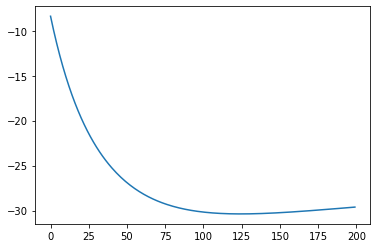

In [13]:
plt.plot(np.arange(len(J)),J)
plt.show()